# Good tester calls for the Data Fetcher and the Site Finder to make sure they're working right!

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import json

# local imports
from find_sites import findSites
findsites = findSites()

import sys
sys.path.append('/Users/olivia/main/research/atmospheric_chem_ML/chem150')
from data_fetcher import DataFetcher
datafetcher = DataFetcher()

In [2]:
ANNUAL_DATA_BY_SITE = 'annualData/bySite'

## Data Fetcher test calls

### Types of Tests

1. Test with no hourly PM2.5

2. Test with hourly PM2.5 

3. Test with hourly PM2.5 after a certain amount of time

4. Test with no data at all

5. Has both types of wind data

6. Has only scalar types of wind data 

7. Test with only one variable that we know is there

8. Test for only one variable we know isn't there

### Actual Tests

#### 1. LA North Mainstreet

This site has no PM2.5 hourly, so it should pull nothing for PM2.5!

It also should eventually be annually scanned so that it doesn't do unneeded pulls!

In [12]:
AQS_LA_df = datafetcher.create_dataset(20190210, 20190210, site=1103, county='037', state='06', processed=True, verbose=False)
AQS_LA_df

Checking year 2019
No hourly data for PM2.5 - Local Conditions (annual check)


,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,Wind Direction - Resultant,Wind Speed - Resultant,Outdoor Temperature,Relative Humidity,Solar radiation,Ultraviolet radiation,Barometric pressure,Carbon monoxide - qualifier,Nitrogen dioxide (NO2) - qualifier,Ozone - qualifier,Wind Direction - Resultant - qualifier,Wind Speed - Resultant - qualifier,Outdoor Temperature - qualifier,Relative Humidity - qualifier,Solar radiation - qualifier,Ultraviolet radiation - qualifier,Barometric pressure - qualifier
datetime,,,,,,,,,,,,,,,,,,,,
2019-02-10 00:00:00,0.4785,19.8,0.007,64.0,3.5,50.3,77.0,0.00,0.00,1005.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 01:00:00,0.3890,15.3,0.010,63.0,2.5,49.6,75.0,0.00,0.00,1005.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 02:00:00,0.3105,11.7,0.013,52.0,2.3,49.6,73.0,0.00,0.00,1005.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 03:00:00,0.3875,12.7,0.012,64.0,1.3,48.8,72.0,0.00,0.00,1005.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 04:00:00,0.3970,17.2,0.007,62.0,2.4,48.5,73.0,0.00,0.00,1004.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 05:00:00,0.3100,13.7,0.010,88.0,2.5,48.9,77.0,0.00,0.00,1004.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 06:00:00,0.3715,15.1,0.010,52.0,3.3,48.7,83.0,0.00,0.00,1004.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 07:00:00,0.3055,11.7,0.012,65.0,2.0,49.3,80.0,0.12,0.01,1005.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 08:00:00,0.2760,8.5,0.019,80.0,3.8,51.0,78.0,0.32,0.02,1005.0,None,None,None,None,None,None,None,None,None,None


#### 2. Long Beach South

This site doesn't have ozone but does have hourly PM2.5 !! This is a good other check to see if regular PM2.5 still works ok.

In [20]:
long_beach_df = datafetcher.create_dataset(20170210, 20170415, site='4004', county='037', state='06', processed=True, verbose=False)
long_beach_df

No matching service was found, please check spelling and case. Link to API Documentation: https://aqs.epa.gov/aqsweb/documents/data_api.html
None


AttributeError: 'NoneType' object has no attribute 'empty'

In [10]:
# now this is a test for if PM2.5 started theoretically in 2018 instead 
long_beach_df = datafetcher.create_dataset(20170210, 20180415, site='4004', county='037', state='06', processed=True, verbose=False)
long_beach_df

No data for Carbon monoxide
No data for Nitrogen dioxide (NO2)
No data for Ozone
No data for Solar radiation
No data for Ultraviolet radiation


,PM2.5 - Local Conditions,Wind Direction - Resultant,Wind Speed - Resultant,Outdoor Temperature,Relative Humidity,Barometric pressure,PM2.5 - Local Conditions - qualifier,Wind Direction - Resultant - qualifier,Wind Speed - Resultant - qualifier,Outdoor Temperature - qualifier,Relative Humidity - qualifier,Barometric pressure - qualifier
datetime,,,,,,,,,,,,
2017-02-10 00:00:00,NaN,300.0,3.3,54.5,80.0,1013.0,None,None,None,None,None,None
2017-02-10 01:00:00,NaN,59.0,1.3,53.1,84.0,1012.0,None,None,None,None,None,None
2017-02-10 02:00:00,NaN,85.0,1.1,52.3,86.0,1012.0,None,None,None,None,None,None
2017-02-10 03:00:00,NaN,5.0,0.7,52.2,87.0,1012.0,None,None,None,None,None,None
2017-02-10 04:00:00,NaN,83.0,2.1,51.4,88.0,1011.0,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-15 19:00:00,20.7,321.0,4.9,57.1,65.0,1010.0,None,None,None,None,None,None
2018-04-15 20:00:00,14.4,307.0,5.3,56.0,67.0,1010.0,None,None,None,None,None,None
2018-04-15 21:00:00,13.4,330.0,5.4,55.3,67.0,1010.0,None,None,None,None,None,None


<AxesSubplot:xlabel='datetime'>

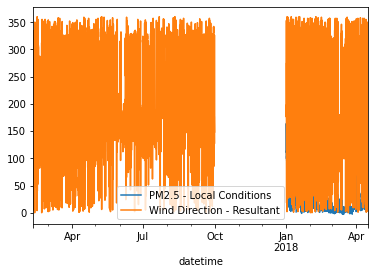

In [11]:
long_beach_df[['PM2.5 - Local Conditions', 'Wind Direction - Resultant']].plot.line()

#### Long pull until Long Beach has PM2.5

Another good test is testing the range where Long Beach starts having hourly PM2.5. First we need to find that time.

We'll do a monitors per state pull to see when the earliest Long Beach PM2.5 data is and then start there!

Then to ensure this is correct, we're going to graph with and without PM2.5 because that allows us to really see all the data!

### Smaller Function Tests

#### 1. Has Sample Duration for several years

#### 2. annual_df: Missing Sample Duration

We're going to check where there's no data. To show that there's no data:

In [26]:
annual_df = datafetcher.get_data(ANNUAL_DATA_BY_SITE, 88101, 20150101, 20150618, df = True, nparams={'state':'06', 'county':'037', 'site':'4004'})
annual_df = annual_df[annual_df['sample_duration'] == '1 HOUR']
annual_df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change


In [28]:
df = datafetcher.annual_checker(88101, 20000618, 20200618, '4004', '037', '06')
df

ystart: 20000618 and yend: 20001231
ystart: 20020101 and yend: 20021231
ystart: 20040101 and yend: 20041231
ystart: 20060101 and yend: 20061231
ystart: 20080101 and yend: 20081231
ystart: 20100101 and yend: 20101231
ystart: 20120101 and yend: 20121231
ystart: 20140101 and yend: 20141231
ystart: 20160101 and yend: 20161231


2016

## Finding Sites test calls

### Actual Tests

#### 1. Regular california call when we know there is data in the state
This works! Yay!

In [3]:
df = findsites.best_sites_state('06',1980)
df

No data for Barometric pressure in this range
No data for PM2.5 - Local Conditions in this range
No data for Ultraviolet radiation in this range
No data for Solar radiation in this range


,local_site_name,county_code,Ozone,Nitrogen dioxide (NO2),Carbon monoxide,Relative Humidity,Outdoor Temperature,Wind Direction - Resultant,Wind Speed - Resultant,total_params
site_number,,,,,,,,,,
0001,Barstow,071,1,1,1,0,0,1,1,5
1006,Alpine,073,1,0,0,1,1,1,1,5
0004,Vallejo,095,1,1,1,0,0,0,0,3
1001,Los Gatos,085,1,1,1,0,0,0,0,3
1004,Upland,071,1,1,1,0,0,0,0,3
1103,Los Angeles-North Main Street,037,1,1,1,0,0,0,0,3
3001,El Rio-Rio Mesa School #2,111,1,0,0,0,0,1,1,3
5001,Palm Springs,065,1,1,1,0,0,0,0,3
8001,Rubidoux,065,1,1,1,0,0,0,0,3


#### 2. California call where we don't know if there's data in the state

In [5]:
df = findsites.best_sites_state('06',1960)

No matching sites found for state 06


#### 3. Call to different state where we give Ozone as a parameter

In [4]:
df = findsites.best_sites_state('06',2001, mandatory_params=['Ozone', 'PM2.5 - Local Conditions'])
df

,local_site_name,county_code,Ozone,Nitrogen dioxide (NO2),Carbon monoxide,Relative Humidity,Barometric pressure,Outdoor Temperature,PM2.5 - Local Conditions,Ultraviolet radiation,Solar radiation,Wind Direction - Resultant,Wind Speed - Resultant,total_params
site_number,,,,,,,,,,,,,,
0004,Madera-Pump Yard,039,1,1,1,1,1,1,1,0,1,1,1,10
0006,Sacramento-Del Paso Manor,067,1,1,1,1,1,1,1,0,1,1,1,10
5001,Clovis-Villa,019,1,1,1,1,1,1,1,0,1,1,1,10
2002,Simi Valley-Cochran Street,111,1,1,1,1,1,1,1,0,1,1,1,10
1103,Los Angeles-North Main Street,037,1,1,1,1,0,1,1,0,1,1,1,9
9004,San Bernardino,071,1,1,1,1,0,1,1,0,0,1,1,8
8001,Rubidoux,065,1,1,1,1,0,1,1,0,0,1,1,8
2005,Pasadena,037,1,1,1,1,0,1,1,0,0,1,1,8
1201,Reseda,037,1,1,1,1,0,1,1,0,0,1,1,8


In [23]:
df = findsites.best_sites_state('06',2010, mandatory_params=['PM2.5 - Local Conditions'])
df

,local_site_name,county_code,Ozone,Nitrogen dioxide (NO2),Barometric pressure,Wind Speed - Resultant,Outdoor Temperature,Solar radiation,Relative Humidity,Ultraviolet radiation,Wind Direction - Resultant,PM2.5 - Local Conditions,Carbon monoxide,total_other_params
site_number,,,,,,,,,,,,,,
1103,Los Angeles-North Main Street,037,1,1,1,1,1,1,1,1,1,1,1,11
1004,Ojai - East Ojai Ave,111,1,1,1,1,1,1,1,0,1,1,1,10
0004,Madera-Pump Yard,039,1,1,1,1,1,1,1,0,1,1,1,10
0006,Sacramento-Del Paso Manor,067,1,1,1,1,1,1,1,0,1,1,1,10
0007,Livermore,001,1,1,1,1,1,1,1,0,1,1,1,10
5001,Clovis-Villa,019,1,1,1,1,1,1,1,0,1,1,1,10
2002,Simi Valley-Cochran Street,111,1,1,1,1,1,1,1,0,1,1,1,10
8005,Red Hills,079,1,1,1,1,1,0,1,0,1,1,1,9
8001,Rubidoux,065,1,1,1,1,1,0,1,0,1,1,1,9


#### 4. Call where there are multiple mandatory parameters

In [27]:
df = findsites.best_sites_state('06',2010, mandatory_params=['Ozone', 'PM2.5 - Local Conditions'])
df

,local_site_name,county_code,Ozone,Nitrogen dioxide (NO2),Barometric pressure,Wind Speed - Resultant,Outdoor Temperature,Solar radiation,Relative Humidity,Ultraviolet radiation,Wind Direction - Resultant,PM2.5 - Local Conditions,Carbon monoxide,total_params
site_number,,,,,,,,,,,,,,
1103,Los Angeles-North Main Street,037,1,1,1,1,1,1,1,1,1,1,1,11
1004,Ojai - East Ojai Ave,111,1,1,1,1,1,1,1,0,1,1,1,10
0004,Madera-Pump Yard,039,1,1,1,1,1,1,1,0,1,1,1,10
0006,Sacramento-Del Paso Manor,067,1,1,1,1,1,1,1,0,1,1,1,10
0007,Livermore,001,1,1,1,1,1,1,1,0,1,1,1,10
5001,Clovis-Villa,019,1,1,1,1,1,1,1,0,1,1,1,10
2002,Simi Valley-Cochran Street,111,1,1,1,1,1,1,1,0,1,1,1,10
8005,Red Hills,079,1,1,1,1,1,0,1,0,1,1,1,9
8001,Rubidoux,065,1,1,1,1,1,0,1,0,1,1,1,9


#### 4. Call to state where we don't give Ozone as a parameter

In [28]:
df = findsites.best_sites_state('06',2010, mandatory_params=['PM2.5 - Local Conditions'])
df

,local_site_name,county_code,Ozone,Nitrogen dioxide (NO2),Barometric pressure,Wind Speed - Resultant,Outdoor Temperature,Solar radiation,Relative Humidity,Ultraviolet radiation,Wind Direction - Resultant,PM2.5 - Local Conditions,Carbon monoxide,total_params
site_number,,,,,,,,,,,,,,
1103,Los Angeles-North Main Street,037,1,1,1,1,1,1,1,1,1,1,1,11
1004,Ojai - East Ojai Ave,111,1,1,1,1,1,1,1,0,1,1,1,10
0004,Madera-Pump Yard,039,1,1,1,1,1,1,1,0,1,1,1,10
0006,Sacramento-Del Paso Manor,067,1,1,1,1,1,1,1,0,1,1,1,10
0007,Livermore,001,1,1,1,1,1,1,1,0,1,1,1,10
5001,Clovis-Villa,019,1,1,1,1,1,1,1,0,1,1,1,10
2002,Simi Valley-Cochran Street,111,1,1,1,1,1,1,1,0,1,1,1,10
8005,Red Hills,079,1,1,1,1,1,0,1,0,1,1,1,9
8001,Rubidoux,065,1,1,1,1,1,0,1,0,1,1,1,9


#### 5. Call where there is hourly PM2.5 data in the state

We know Long Beach has hourly PM2.5 starting in like 2017!

In [12]:
df = findsites.best_sites_state('06',2017, mandatory_params=['PM2.5 - Local Conditions'])
df

  state_code county_code site_number parameter_code  poc   latitude  \
2         06         037        9033          88101    1  34.669739   

    longitude  datum                 parameter sample_duration_code  ...  \
2 -118.130511  NAD83  PM2.5 - Local Conditions                    1  ...   

  fiftieth_percentile tenth_percentile            local_site_name  \
2                 6.7              1.7  Lancaster-Division Street   

                        site_address       state       county       city  \
2  43301 DIVISION ST., LANCASTER, CA  California  Los Angeles  Lancaster   

   cbsa_code                                cbsa date_of_last_change  
2      31080  Los Angeles-Long Beach-Anaheim, CA          2021-11-05  

[1 rows x 56 columns]


,local_site_name,county_code,Ozone,Nitrogen dioxide (NO2),Carbon monoxide,Relative Humidity,Barometric pressure,Outdoor Temperature,PM2.5 - Local Conditions,Ultraviolet radiation,Solar radiation,Wind Direction - Resultant,Wind Speed - Resultant,total_params
site_number,,,,,,,,,,,,,,
8001,Rubidoux,065,1,1,1,1,1,1,1,1,1,1,1,11
0008,King City 2,053,1,1,1,1,1,1,1,1,1,1,1,11
0011,Fresno - Garland,019,1,1,1,1,1,1,1,1,1,1,1,11
1103,Los Angeles-North Main Street,037,1,1,1,1,1,1,1,1,1,1,1,11
1004,Ojai - East Ojai Ave,111,1,1,1,1,1,1,1,0,1,1,1,10
0004,Madera-Pump Yard,039,1,1,1,1,1,1,1,0,1,1,1,10
0006,Sacramento-Del Paso Manor,067,1,1,1,1,1,1,1,0,1,1,1,10
0007,Livermore,001,1,1,1,1,1,1,1,0,1,1,1,10
5001,Clovis-Villa,019,1,1,1,1,1,1,1,0,1,1,1,10


Now let's check if this actually has annual!

In [18]:
rubidoux_df = datafetcher.create_dataset(20170210, 20170415, site='1103', county='037', state='06', processed=True, verbose=True)
rubidoux_df



 Fetching data for Carbon monoxide...

No matching service was found, please check spelling and case. Link to API Documentation: https://aqs.epa.gov/aqsweb/documents/data_api.html
None


AttributeError: 'NoneType' object has no attribute 'empty'

#### 5. Call where we give an end year

#### 6. Call where there are no other params

In [13]:
df = findsites.best_sites_state('06',2010, mandatory_params=['Ozone', 'PM2.5 - Local Conditions'], other_params=[])
df

No matching service was found, please check spelling and case. Link to API Documentation: https://aqs.epa.gov/aqsweb/documents/data_api.html


TypeError: 'NoneType' object is not subscriptable

#### Call giving both mandatory and other parameters